# Conectando con google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def print_resultados (xdata, ydata, yerr, errf, pfinal, covar,nparm=1):

    # Grados de Libertad
    degfree = len(xdata)  - nparm

    # Chi Cuadrado reducido
    s_sq = (errf(pfinal,xdata, ydata, yerr)**2).sum()/degfree
    print ("Chi^2_reducido: {:.2f}".format(s_sq))

    pcov = covar * s_sq
    perr = np.sqrt(np.diag(covar))

    # Valor de los Parametros Ajustados
    for i in np.arange(nparm):
        print ("P_{} = {:.2f} +- {:.2f} ".format(i, pfinal[i], perr[i]))

In [ ]:
def print_qui2 (xdata, ydata, yerr, errf, pfinal, nparm=1):

    # Grados de Libertad
    degfree = len(xdata)  - nparm

    # Chi Cuadrado reducido
    s_sq = (errf(pfinal,xdata, ydata, yerr)**2).sum()/degfree
    print ("Chi^2_reducido: {:.2f}".format(s_sq))

# Importando biblotecas

In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# Cargando los datos del laboratorio

In [ ]:
data=np.loadtxt("/content/drive/MyDrive/Colab Notebooks/datos/esfera1.txt")
print(data)

[[0.601   0.01137 0.04917]
 [0.668   0.03935 0.05046]
 [0.734   0.06897 0.05192]
 [0.801   0.11    0.0496 ]
 [0.868   0.15    0.05218]
 [0.935   0.185   0.05506]
 [1.002   0.24    0.04839]
 [1.068   0.294   0.0508 ]
 [1.135   0.344   0.04861]
 [1.202   0.406   0.0477 ]
 [1.269   0.468   0.04426]
 [1.335   0.536   0.04813]
 [1.402   0.602   0.04684]
 [1.469   0.682   0.04701]
 [1.536   0.763   0.04891]
 [1.603   0.848   0.04297]
 [1.669   0.932   0.04439]
 [1.736   0.991   0.05059]]


In [ ]:
t = data[:,0]-0.601
x = data[:,1]-0.01137

In [ ]:
print(t,x)

[0.    0.067 0.133 0.2   0.267 0.334 0.401 0.467 0.534 0.601 0.668 0.734
 0.801 0.868 0.935 1.002 1.068 1.135] [0.      0.02798 0.0576  0.09863 0.13863 0.17363 0.22863 0.28263 0.33263
 0.39463 0.45663 0.52463 0.59063 0.67063 0.75163 0.83663 0.92063 0.97963]


# Graficando los datos observados de la esfera

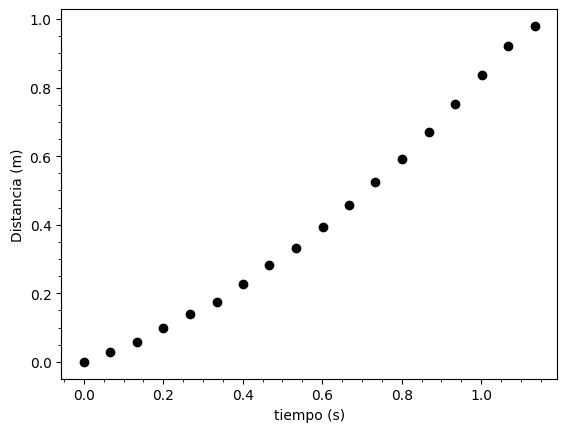

In [ ]:
plt.plot(t,x, 'ko')
plt.ylabel('Distancia (m)')
plt.xlabel('tiempo (s)')
plt.minorticks_on()

# Creando Funcion de ajuste

In [ ]:
def plano(g,t):
  x = 0.5*g*np.sin(np.deg2rad(10))*t**2
  return x

In [ ]:
t_test = np.linspace(0,1.3,20)
x_test = plano(9.3, t_test)

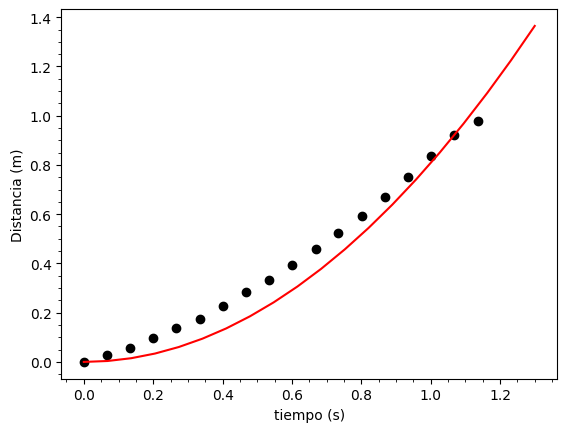

In [ ]:
plt.plot(t,x, 'ko')
plt.plot(t_test, x_test, 'r-')
plt.ylabel('Distancia (m)')
plt.xlabel('tiempo (s)')
plt.minorticks_on()

# Función error para minimizar y encontrar el mejor parametro para la gravedad

In [ ]:
def error (g,t,x,x_err):
  return((x-plano(g, t))/x_err)

In [ ]:
x_err = 0.005+np.zeros((len(x)))
print(x_err)

[0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005]


# Función de Ajuste

In [ ]:
resultado=optimize.leastsq(error,[9.3], args=(t,x,x_err), full_output=1 )
print("Mejor ajuste para la gravedad {:.2f}".format(resultado[0][0]))

Mejor ajuste para la gravedad 9.82


In [ ]:
print_resultados (t,x, x_err, error, resultado[0], resultado[1],nparm=1)

Chi^2_reducido: 192.92
P_0 = 9.82 +- 0.02 


# Graficando el ajuste

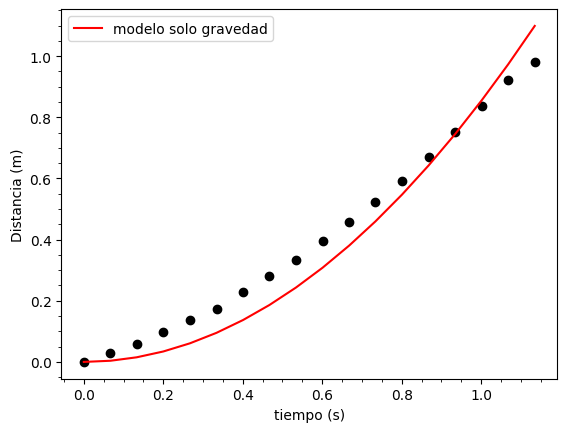

In [ ]:
x_test = plano(resultado[0][0],t)

plt.plot(t,x, 'ko')
plt.plot(t, x_test, 'r-', label='modelo solo gravedad')
plt.ylabel('Distancia (m)')
plt.xlabel('tiempo (s)')
plt.minorticks_on()
plt.legend()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/graficos/ajuste_esfera1.png')

# Modelo considerando la velocidad Inicial

In [ ]:
def plano_v0(parm,t):
  v0 = parm[0]
  g  = parm[1]
  x = v0*t + 0.5*g*np.sin(np.deg2rad(10))*t**2
  return x

def error_v0 (parm,t,x,x_err):
  return((x-plano_v0(parm, t))/x_err)


resultado=optimize.leastsq(error_v0,[0.1,9.3], args=(t,x,x_err), full_output=1 )
print("Mejor ajuste para V0 {:.2f}".format(resultado[0][0]))
print("Mejor ajuste para la gravedad {:.2f}".format(resultado[0][1]))

Mejor ajuste para V0 0.40
Mejor ajuste para la gravedad 4.83


In [ ]:
print_resultados (t,x, x_err, error_v0, resultado[0], resultado[1],nparm=2)

Chi^2_reducido: 1.91
P_0 = 0.40 +- 0.01 
P_1 = 4.83 +- 0.09 


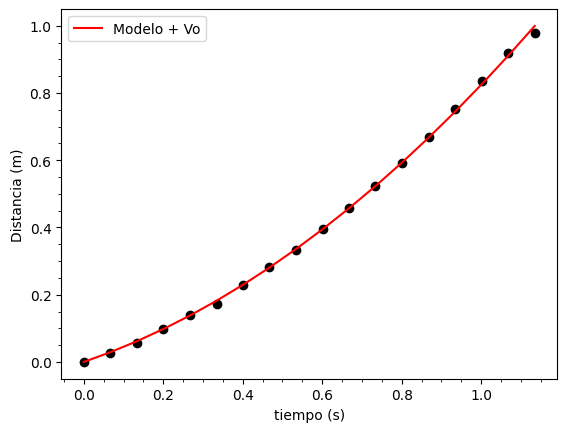

In [ ]:
x_test = plano_v0([resultado[0][0],resultado[0][1]],t)

plt.plot(t,x, 'ko')
plt.plot(t, x_test, 'r-', label="Modelo + Vo")
plt.ylabel('Distancia (m)')
plt.xlabel('tiempo (s)')
plt.minorticks_on()
plt.legend()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/graficos/ajuste_v0_esfera1.png')

# Modelo Con fricción y restricciones

In [104]:
def plano_v0_friccion(parm,t):
  v0 = parm[0]
  g  = abs(parm[1])
  mu  = abs(parm[2])
  x = v0*t + 0.5*g*(np.sin(np.deg2rad(7))-mu*np.cos(np.deg2rad(7))) *t**2
  return x

def error_v0_friccion (parm,t,x,x_err):
    return((x-plano_v0_friccion(parm, t))/x_err)

# Define the objective function for minimize
def objective_function(parm, t, x, x_err):
  return np.sum(error_v0_friccion(parm, t, x, x_err)**2)

# Define bounds for the parameters [v0, g, mu]
# Assuming v0 >= 0, g >= 0, and mu >= 0
bounds = [(0, None), (0, None), (0, None)]

# Initial guess for the parameters
initial_guess = [0.021, 9.3, 0.01]

# Perform the constrained minimization
resultado_constrained = optimize.minimize(objective_function, initial_guess, args=(t, x, x_err), bounds=bounds)

# Print the results
print("Mejor ajuste para V0 (constrained): {:.2f}".format(resultado_constrained.x[0]))
print("Mejor ajuste para la gravedad (constrained): {:.2f}".format(resultado_constrained.x[1]))
print("Mejor ajuste para Mu (constrained): {:.2f}".format(resultado_constrained.x[2]))

print_qui2(t,x, x_err, error_v0_friccion, resultado_constrained.x, nparm=3)

Mejor ajuste para V0 (constrained): 0.40
Mejor ajuste para la gravedad (constrained): 9.32
Mejor ajuste para Mu (constrained): 0.03
Chi^2_reducido: 2.04


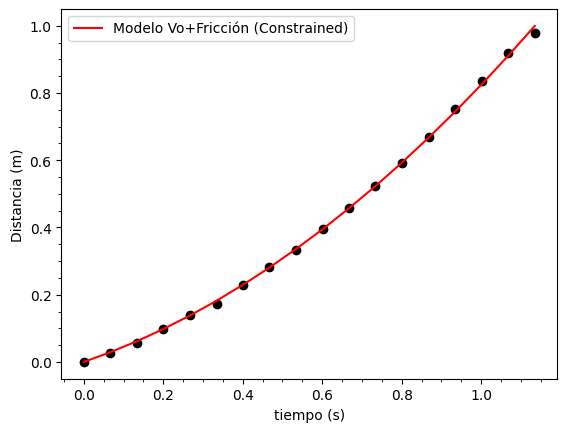

In [105]:
x_test_constrained = plano_v0_friccion(resultado_constrained.x, t)

plt.plot(t, x, 'ko')
plt.plot(t, x_test_constrained, 'r-', label="Modelo Vo+Fricción (Constrained)")
plt.ylabel('Distancia (m)')
plt.xlabel('tiempo (s)')
plt.minorticks_on()
plt.legend()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/graficos/ajuste_v0_friccion_constrained_esfera1.png')